<a href="https://colab.research.google.com/github/chaehyun29/MLDL/blob/main/dacon_card_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pwd

/content


In [13]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [14]:
!cp /gdrive/MyDrive/tmp/dacon_card_Data.zip ./

In [15]:
!ls -al

ls: cannot access 'drive': Transport endpoint is not connected
total 227872
drwxr-xr-x 1 root root     4096 Jul  2 12:24 .
drwxr-xr-x 1 root root     4096 Jul  2 12:23 ..
drwxr-xr-x 4 root root     4096 Jun 29 13:43 .config
-rw------- 1 root root 72429599 Jul  2 12:24 dacon_card_Data.zip
d????????? ? ?    ?           ?            ? drive
drwxr-xr-x 1 root root     4096 Jun 29 13:44 sample_data
-rw-r--r-- 1 root root  1425039 Jun 30 10:28 sample_submission.csv
-rw-r--r-- 1 root root 79840026 Jun 30 10:28 test.csv
-rw-r--r-- 1 root root 63625405 Jun 30 10:28 train.csv
-rw-r--r-- 1 root root 15992449 Jun 30 10:28 val.csv


In [16]:
!unzip dacon_card_Data.zip

Archive:  dacon_card_Data.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
!ls -al

ls: cannot access 'drive': Transport endpoint is not connected
total 227872
drwxr-xr-x 1 root root     4096 Jul  2 12:24 .
drwxr-xr-x 1 root root     4096 Jul  2 12:23 ..
drwxr-xr-x 4 root root     4096 Jun 29 13:43 .config
-rw------- 1 root root 72429599 Jul  2 12:24 dacon_card_Data.zip
d????????? ? ?    ?           ?            ? drive
drwxr-xr-x 1 root root     4096 Jun 29 13:44 sample_data
-rw-r--r-- 1 root root  1425039 Jun 30 10:28 sample_submission.csv
-rw-r--r-- 1 root root 79840026 Jun 30 10:28 test.csv
-rw-r--r-- 1 root root 63625405 Jun 30 10:28 train.csv
-rw-r--r-- 1 root root 15992449 Jun 30 10:28 val.csv


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('val.csv')

In [20]:
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [21]:
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [22]:
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


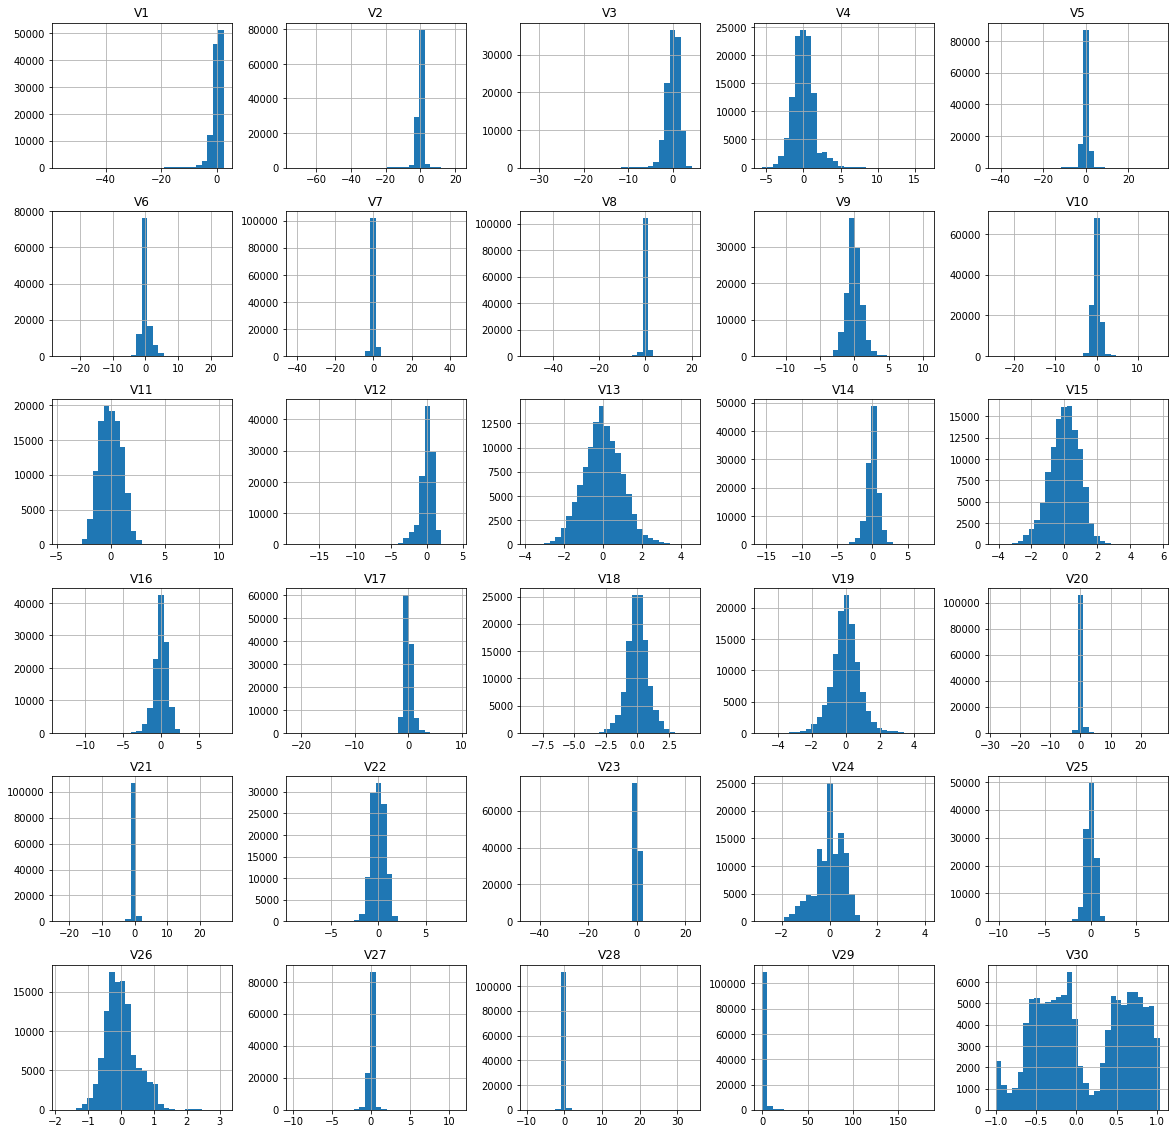

In [23]:
train_df.drop(columns=['ID']).hist(bins = 30, figsize = (20,20))
plt.show()

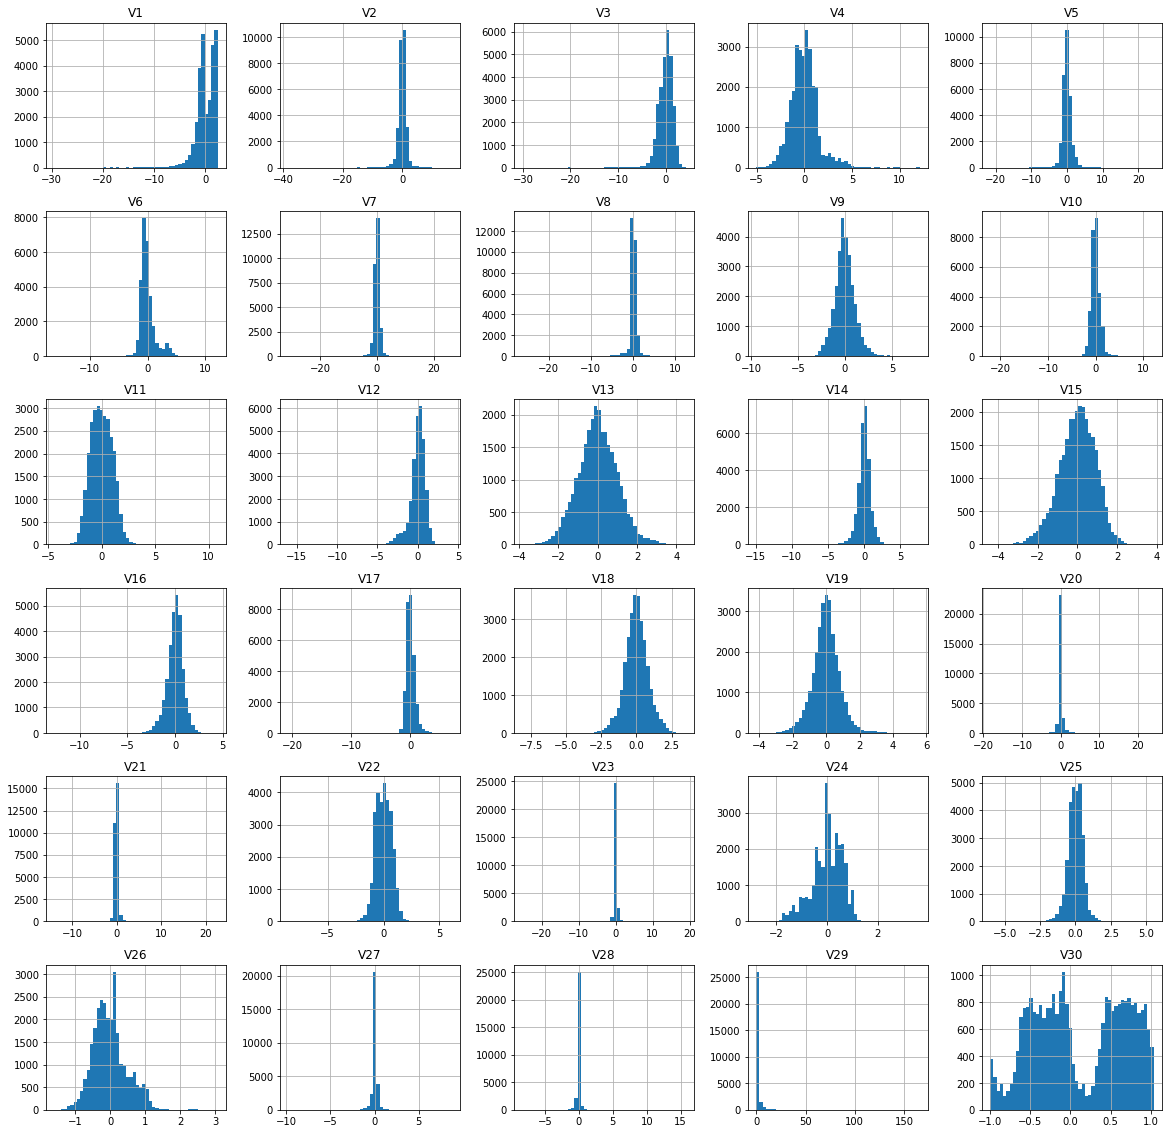

In [24]:
val_df.drop(columns=['ID','Class']).hist(bins=50, figsize=(20,20))
plt.show()

validation set의 사기 거래 비율

In [25]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(val_contamination)

0.0010551491277433877


In [34]:
train_x = np.array(train_df.drop(columns=['ID']))
test_x = np.array(test_df.drop(columns=['ID']))
val_x = np.array(val_df.drop(columns=['ID','Class']))

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

(113842, 30)
(142503, 30)
(28462, 30)


In [27]:
'''
train_x = np.array(train_df.drop(columns=['ID'])).reshape(-1,30,1)
test_x = np.array(test_df.drop(columns=['ID'])).reshape(-1,30,1)
val_x = np.array(val_df.drop(columns=['ID','Class'])).reshape(-1,30,1)

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
'''

"\ntrain_x = np.array(train_df.drop(columns=['ID'])).reshape(-1,30,1)\ntest_x = np.array(test_df.drop(columns=['ID'])).reshape(-1,30,1)\nval_x = np.array(val_df.drop(columns=['ID','Class'])).reshape(-1,30,1)\n\nprint(train_x.shape)\nprint(test_x.shape)\nprint(val_x.shape)\n"

In [47]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [36]:

model = Sequential()

model.add(Input(shape=(30)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=["acc"])

model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
     monitor = 'val_loss', 
     verbose=1,
     save_best_only=True)



hist = model.fit(train_x, train_x, epochs=1000, batch_size=1024, 
                 validation_split=0.1, callbacks=[early_stopping,model_checkpoint])



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               3968      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 30)                3870      
                                                                 
Total params: 28,606
Trainable params: 28,606
Non-trai

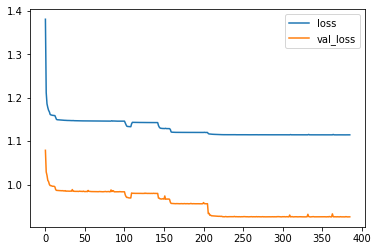

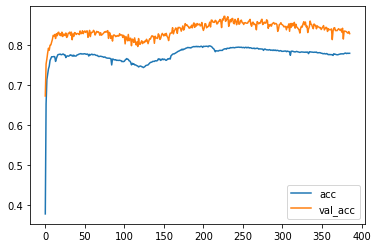

In [37]:
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

plt.plot(hist.history['acc'],label = 'acc')
plt.plot(hist.history['val_acc'],label = 'val_acc')
plt.legend()
plt.show()


In [38]:
val_x.shape

(28462, 30)

In [48]:
model = load_model('best_model.h5')
_y = model.predict(val_x)
_y.shape

(28462, 30)

In [50]:
val_x[1,:]

array([ 0.96249607,  0.32846103, -0.17147905,  2.10920407,  1.12956557,
        1.69603769,  0.10771161,  0.52150216, -1.1913111 ,  0.72439631,
        1.69032992,  0.40677358, -0.9364213 ,  0.98373942,  0.71091077,
       -0.60223177,  0.40248438, -1.73716203, -2.02761232, -0.26932097,
        0.14399742,  0.40249166, -0.04850822, -1.37186629,  0.39081389,
        0.19996366,  0.01637064, -0.01460533,  0.16893733, -0.99478377])

In [51]:
_y[1,:]

array([9.62170780e-01, 3.44740570e-01, 1.56230815e-02, 9.99989748e-01,
       9.78717148e-01, 9.98484194e-01, 7.33625069e-02, 5.37518024e-01,
       1.61384685e-06, 7.88739979e-01, 9.99949694e-01, 4.04215187e-01,
       6.19780549e-05, 9.49566782e-01, 7.38501191e-01, 1.91787025e-04,
       7.52609170e-14, 2.13931808e-14, 7.14813737e-08, 2.99642201e-13,
       1.19023877e-12, 4.00669217e-01, 4.51499428e-12, 3.55127203e-14,
       3.73045385e-01, 1.93916857e-01, 2.10118899e-03, 2.24172636e-13,
       2.19215259e-01, 7.28526402e-07], dtype=float32)

In [81]:
errors = []
for (x, y) in zip(test_x, _y):
    mse = np.mean((x-y)**2)
    errors.append(mse)

In [67]:
threshold = np.quantile(errors,0.99)
print(threshold)

17.445055753137822


In [71]:
anomaly_idxs = np.where(np.array(errors) >= threshold)[0]
print(len(anomaly_idxs))
print(anomaly_idxs[:10])

285
[  81  429  643  820 1109 1330 1352 1355 1495 1497]


In [73]:
test_y_df = pd.read_csv('sample_submission.csv')

In [75]:
pr_y = np.zeros(len(test_y_df))
for i in anomaly_idxs:
    pr_y[i] = 1

test_y_df['Class'] = pr_y
print(test_y_df)
    

             ID  Class
0       AAAA0x1    0.0
1       AAAA0x2    0.0
2       AAAA0x5    0.0
3       AAAA0x7    0.0
4       AAAA0xc    0.0
...         ...    ...
142498  0x4587f    0.0
142499  0x45880    0.0
142500  0x45884    0.0
142501  0x45885    0.0
142502  0x45887    0.0

[142503 rows x 2 columns]


In [77]:
print(test_y_df['Class'].unique())

[0. 1.]


In [78]:
test_y_df.to_csv('submission.csv', index=False)

In [79]:
!head submission.csv

ID,Class
AAAA0x1,0.0
AAAA0x2,0.0
AAAA0x5,0.0
AAAA0x7,0.0
AAAA0xc,0.0
AAAA0xd,0.0
AAA0x11,0.0
AAA0x15,0.0
AAA0x17,0.0


In [88]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(val_contamination)

0.0010551491277433877


In [87]:
p_normal, p_fraud = test_y_df['Class'].value_counts()
p_contamination = p_fraud / val_normal
print(p_contamination)

0.010023916713562184


In [89]:
_vali_y = model.predict(val_x)
_vali_y.shape

(28462, 30)

In [101]:
errors = []

for (i,j) in zip(val_x,_vali_y):
    mse = np.mean(i-j)**2
    errors.append(mse)

In [102]:
threshold = np.quantile(errors,0.99)
print(threshold)

0.3841951282613593


In [103]:
anomaly_idxs = np.where(np.array(errors) >= threshold)[0]
print(len(anomaly_idxs))
print(anomaly_idxs[:10])

285
[ 172  257  641  696  836 1047 1196 1201 1210 1345]


In [104]:

pr_val_y = np.zeros(len(val_x))
for i in anomaly_idxs:
    pr_val_y[i] = 1



In [126]:

score=[]
val_y = val_df["Class"]
val_y = val_y.to_numpy()

print(pr_val_y.shape)
print(val_y.shape)

for i in range(len(pr_val_y)):
    if pr_val_y[i]==val_y[i]:
        score.append(1)
    else:
        score.append(0)

score = score.count(1) / len(score)
print(score)


(28462,)
(28462,)
0.9906190710420912
